# AUTOSKLEARN

## Importación y carga de librerías

In [1]:
!pip install auto-sklearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 6.5 MB 7.0 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 260 kB 44.8 MB/s 
     |████████████████████████████████| 22.3 MB 54.9 MB/s 
     |████████████████████████████████| 4.3 MB 21.1 MB/s 
     |████████████████████████████████| 4.4 MB 44.7 MB/s 
     |████████████████████████████████| 46 kB 2.6 MB/s 
  Created wheel for auto-sklearn: filename=auto_sklearn-0.15.0-py3-none-any.whl size=6641946 sha256=d5b8245f4d0b3786025ee61accdddbe19779794ef33d0929eedec101457e49ba
  Stored in directory: /root/.cache/pip/wheels/26/57/ce/ca63ad74b90273f9a682028d187645a42dce5c5255228d46c8
  Created wheel for pynisher: filename=pynisher-0.6.4-py3-none-any.whl size=7043 sha256=6e16af364f6f43d929b2c50aac91d220924aafe85fcc1c26f699e2481f01affb
  St

In [2]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.8 MB 5.4 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.2
    Uninstalling scikit-learn-0.24.2:
      Successfully uninstalled scikit-learn-0.24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
auto-sklearn 0.15.0 requires scikit-learn<0.25.0,>=0.24.0, but you have scikit-learn 1.0.2 which is incompatible.


In [3]:
## Numéricas
import pandas as pd
import numpy as np

## Formato fechas
from datetime import datetime, timedelta

## Gráficas
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from mlxtend.plotting import plot_decision_regions
from pprint import pprint

# Metricas
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score, mean_absolute_percentage_error
from scipy import stats
import sklearn.metrics as metrics

# Modelos
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedKFold, GridSearchCV, KFold
import autosklearn.classification
import autosklearn.regression
import statsmodels.api as sm

In [58]:
# Configuración de estilos de matplotlib
plt.rcParams['image.cmap'] = "bwr"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

## Carga de datos

In [4]:
#Se importa la librería de google colab para gestionar archivos
from google.colab import files

In [5]:
#Se conecta con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Ruta donde se tienen los datos
ruta_datos='/content/drive/MyDrive/0_TFM_BD/data/'
ruta_datos_carga=ruta_datos+'saved/'

In [7]:
#Carga de los datos
df=pd.read_csv(ruta_datos_carga+'df_exp_2020-01-01_2022-01-01.csv')

#Generación del indice como fecha
df['date']=pd.to_datetime(df.date)
df.set_index('date', inplace=True)

df_ori=df.copy()

In [10]:
df

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,flag,^IBEX,futIBEX
date,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,0.0,9543.9,9528.3
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,0.0,9528.3,9511.7
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,1.0,9511.7,9572.5
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,1.0,9572.5,9681.3
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,0.0,9681.3,9658.8
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,1.0,8387.5,8459.1
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,1.0,8459.1,8563.7
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,1.0,8563.7,8563.7


## Creación de los conjuntos de datos

In [11]:
#Columna donde se recogen las variables predictoras
var_pred=df.columns.to_list()
var_pred.remove('futIBEX')
var_pred.remove('flag')

In [12]:
#Se generan los df para X e y
X=df[var_pred]
y=df[['futIBEX']]

In [13]:
#Se generan los conjuntos de datos mediante un split
X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        y,
                                        train_size   = 0.7,
                                        random_state = 123,
                                        shuffle      = True
                                    )

## Creación del modelo de regresión con AutoSklearn

In [16]:
#Generación del modelo de regresión de autosklearn
automl = autosklearn.regression.AutoSklearnRegressor(
    time_left_for_this_task=2100,
    per_run_time_limit=90,
    tmp_folder='/tmp/autosklearn_regression_example_tmp',
)

#Entrenamiento del modelo
automl.fit(X_train, y_train, dataset_name='futIBEX')


AutoSklearnRegressor(ensemble_class=<class 'autosklearn.ensembles.ensemble_selection.EnsembleSelection'>,
                     per_run_time_limit=90, time_left_for_this_task=2100,
                     tmp_folder='/tmp/autosklearn_regression_example_tmp')

## Resultados

In [17]:
print(automl.leaderboard())

          rank  ensemble_weight              type      cost  duration
model_id                                                             
240          1             0.02  gaussian_process  0.014499  1.741650
118          2             0.18  gaussian_process  0.015107  3.525616
95           3             0.20  gaussian_process  0.016503  2.419589
278          4             0.22  gaussian_process  0.016583  1.030719
66           5             0.22  gaussian_process  0.017003  4.028355
9            6             0.16     random_forest  0.017086  8.487857


In [27]:
#Puntuación de automl del modelo obtenido
#Entrenamiento
print('Puntuación del modelo con los datos de entrenamiento:', round(automl.score(X_train, y_train),2))

#Validación
print('Puntuación del modelo con los datos de validación:', round(automl.score(X_test, y_test),2))

Puntuación del modelo con los datos de entrenamiento: 0.99
Puntuación del modelo con los datos de validación: 0.98


Los resultados muestran que los mejores mecanismos de predicción son los "Procesos Gausianos"

In [34]:
#Se muestran los modelos entrenados
modelos=pd.DataFrame(automl.show_models())
modelos.T

,model_id,rank,cost,ensemble_weight,data_preprocessor,feature_preprocessor,regressor,sklearn_regressor
9,9,1,0.017086,0.16,<autosklearn.pipeline.components.data_preproce...,<autosklearn.pipeline.components.feature_prepr...,<autosklearn.pipeline.components.regression.Re...,(DecisionTreeRegressor(criterion='absolute_err...
66,66,2,0.017003,0.22,<autosklearn.pipeline.components.data_preproce...,<autosklearn.pipeline.components.feature_prepr...,<autosklearn.pipeline.components.regression.Re...,GaussianProcessRegressor(alpha=0.0199364419922...
95,95,3,0.016503,0.2,<autosklearn.pipeline.components.data_preproce...,<autosklearn.pipeline.components.feature_prepr...,<autosklearn.pipeline.components.regression.Re...,GaussianProcessRegressor(alpha=0.0062584495127...
118,118,4,0.015107,0.18,<autosklearn.pipeline.components.data_preproce...,<autosklearn.pipeline.components.feature_prepr...,<autosklearn.pipeline.components.regression.Re...,GaussianProcessRegressor(alpha=0.0121829984110...
240,240,5,0.014499,0.02,<autosklearn.pipeline.components.data_preproce...,<autosklearn.pipeline.components.feature_prepr...,<autosklearn.pipeline.components.regression.Re...,GaussianProcessRegressor(alpha=0.0108598282331...
278,278,6,0.016583,0.22,<autosklearn.pipeline.components.data_preproce...,<autosklearn.pipeline.components.feature_prepr...,<autosklearn.pipeline.components.regression.Re...,GaussianProcessRegressor(alpha=0.0058557070398...


In [39]:
#Resultados de los modelos probados
df_cv_results = pd.DataFrame(automl.cv_results_).sort_values(by = 'mean_test_score', ascending = False)
df_cv_results

,mean_test_score,rank_test_scores,mean_fit_time,params,status,budgets,param_data_preprocessor:__choice__,param_feature_preprocessor:__choice__,param_regressor:__choice__,param_data_preprocessor:feature_type:numerical_transformer:imputation:strategy,...,param_regressor:gradient_boosting:n_iter_no_change,param_regressor:gradient_boosting:validation_fraction,param_regressor:libsvm_svr:coef0,param_regressor:libsvm_svr:degree,param_regressor:libsvm_svr:gamma,param_regressor:mlp:validation_fraction,param_regressor:sgd:epsilon,param_regressor:sgd:eta0,param_regressor:sgd:l1_ratio,param_regressor:sgd:power_t
238,0.985501,1,1.741650,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,pca,gaussian_process,median,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
224,0.985079,2,2.828540,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,polynomial,gaussian_process,mean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213,0.985079,3,2.571326,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,polynomial,gaussian_process,mean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,0.985078,4,2.742283,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,polynomial,gaussian_process,median,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
183,0.985072,5,3.419119,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,polynomial,gaussian_process,most_frequent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38,-0.002744,263,0.953201,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,fast_ica,gaussian_process,median,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
163,-0.002744,263,0.975793,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,fast_ica,gaussian_process,mean,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,-0.018481,279,0.962039,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,pca,decision_tree,most_frequent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,-0.246808,280,0.915169,{'data_preprocessor:__choice__': 'feature_type...,Success,0.0,feature_type,pca,gaussian_process,most_frequent,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [38]:
# Resultados del mejor modelo
automl.cv_results_['params'][np.argmax(automl.cv_results_['mean_test_score'])]


{'data_preprocessor:__choice__': 'feature_type',
 'feature_preprocessor:__choice__': 'pca',
 'regressor:__choice__': 'gaussian_process',
 'data_preprocessor:feature_type:numerical_transformer:imputation:strategy': 'median',
 'data_preprocessor:feature_type:numerical_transformer:rescaling:__choice__': 'standardize',
 'feature_preprocessor:pca:keep_variance': 0.9734611074473212,
 'feature_preprocessor:pca:whiten': 'False',
 'regressor:gaussian_process:alpha': 0.010859828233192743,
 'regressor:gaussian_process:thetaL': 1.3842071716080672e-10,
 'regressor:gaussian_process:thetaU': 2351.2544309051796}

## Métricas

In [43]:
#R2
train_predictions = automl.predict(X_train)
print("Train R2 score:", metrics.r2_score(y_train, train_predictions))
test_predictions = automl.predict(X_test)
print("Test R2 score:", metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.9904237015599785
Test R2 score: 0.979923726236193


### Train

In [51]:
#Metricas relevantes del modelo generado y sus predicciones

#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_train, train_predictions)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_train, train_predictions)*100

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_train, train_predictions)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#R2
r2 = metrics.r2_score(y_train,train_predictions)

print("- TRAIN -")
print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2),"%")
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

- TRAIN -
Resultado de las métricas:
MAE: 68.68
MAPE: 0.87 %
RMSE 90.62
R2: 0.99


### Test

In [52]:
#Metricas relevantes del modelo generado y sus predicciones

#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_test, test_predictions)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_test, test_predictions)*100

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_test, test_predictions)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#R2
r2 = metrics.r2_score(y_test,test_predictions)

print("- TEST -")
print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2),"%")
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

- TEST -
Resultado de las métricas:
MAE: 93.1
MAPE: 1.19 %
RMSE 132.81
R2: 0.98


## Gráficas test y train vs valores reales

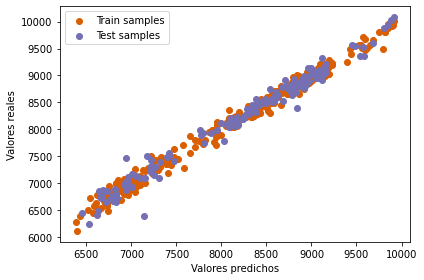

In [53]:
plt.scatter(train_predictions, y_train, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, y_test, label="Test samples", c='#7570b3')
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.legend()
plt.plot(c='k', zorder=0)
plt.tight_layout()
plt.show()

## Análisis de residuos

### Train

In [54]:
y_verdad=y_train.copy()
y_verdad.reset_index(drop=True, inplace=True)
y_verdad

,futIBEX
0,7033.2
1,8200.7
2,8174.8
3,7006.0
4,8701.9
...,...
347,7626.4
348,8753.2
349,8711.4
350,8816.7


In [55]:
y_prediccion=pd.DataFrame(train_predictions, columns=['pred'])
y_prediccion

,pred
0,6935.558289
1,8215.691330
2,8137.228989
3,6985.455856
4,8626.685974
...,...
347,7470.641495
348,8920.799393
349,8594.800980
350,8778.958649


In [56]:
# Análisis de residuos
residuos_train=y_prediccion['pred'] - y_verdad['futIBEX']
residuos_train

0      -97.641711
1       14.991330
2      -37.571011
3      -20.544144
4      -75.214026
          ...    
347   -155.758505
348    167.599393
349   -116.599020
350    -37.741351
351     10.717783
Length: 352, dtype: float64

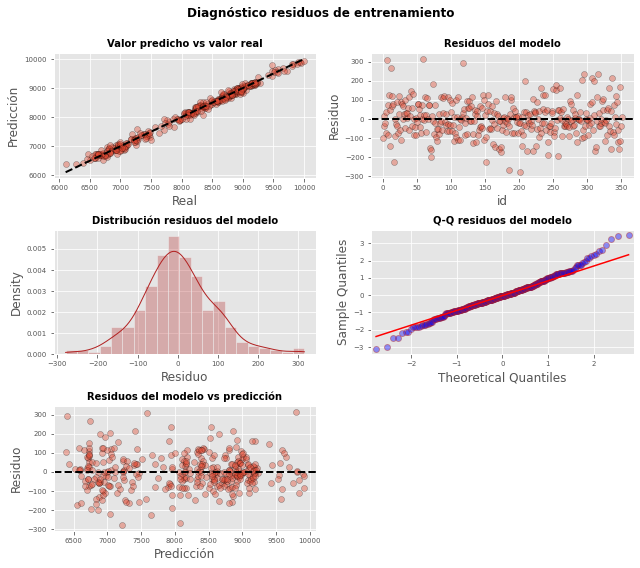

In [59]:
#Gráficas para analizar los residuos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

#Gráfica 1: Predicción vs Real
axes[0, 0].scatter(y_train, train_predictions, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#Gráfica 2: Residuos
axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

#Gráfica 3: Distribución de residuos
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)

#Gráfica 4: Q-Q del modelo
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

#Gráfica 5: Residuos del model vs predicción
axes[2, 0].scatter(train_predictions, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos de entrenamiento', fontsize = 12, fontweight = "bold");

Para comprobar si los residuos siguen una distribución normal, se emplearán los test estadísticos de Shapiro y de D'Agostino's K-squared test

In [60]:
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9867467284202576, pvalue=0.002624680520966649)

In [61]:
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 12.92812786085743, p-value = 0.0015584493937210887


### Test

In [63]:
y_verdad=y_test.copy()
y_verdad.reset_index(drop=True, inplace=True)
y_verdad

,futIBEX
0,8635.4
1,8058.1
2,8694.8
3,8821.3
4,8780.0
...,...
147,6856.8
148,7154.3
149,8688.9
150,9092.2


In [64]:
y_prediccion=pd.DataFrame(test_predictions, columns=['pred'])
y_prediccion

,pred
0,8781.766144
1,8145.866882
2,8833.809998
3,8774.514618
4,8787.033066
...,...
147,6726.993011
148,7249.437332
149,8609.898499
150,9139.830322


In [65]:
# Análisis de residuos
residuos_test=y_prediccion['pred'] - y_verdad['futIBEX']
residuos_test

0      146.366144
1       87.766882
2      139.009998
3      -46.785382
4        7.033066
          ...    
147   -129.806989
148     95.137332
149    -79.001501
150     47.630322
151     59.331326
Length: 152, dtype: float64

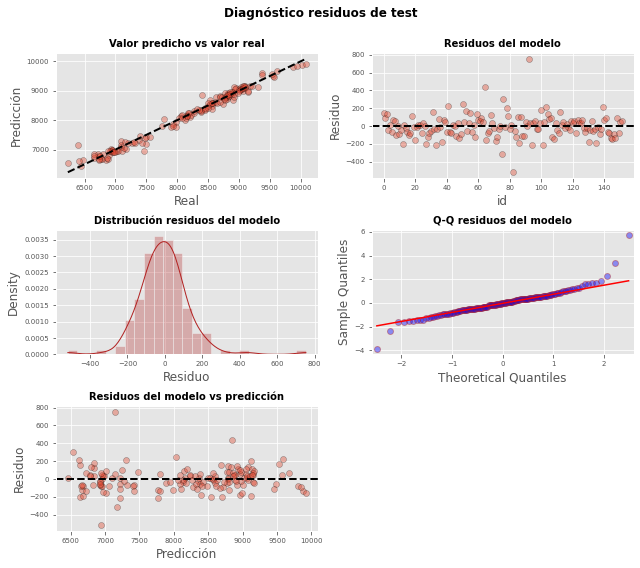

In [66]:
#Gráficas para analizar los residuos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

#Gráfica 1: Predicción vs Real
axes[0, 0].scatter(y_test, test_predictions, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#Gráfica 2: Residuos
axes[0, 1].scatter(list(range(len(y_test))), residuos_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_test,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

#Gráfica 3: Distribución de residuos
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_test,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)

#Gráfica 4: Q-Q del modelo
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

#Gráfica 5: Residuos del model vs predicción
axes[2, 0].scatter(test_predictions, residuos_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos de test', fontsize = 12, fontweight = "bold");

Para comprobar si los residuos siguen una distribución normal, se emplearán los test estadísticos de Shapiro y de D'Agostino's K-squared test

In [67]:
shapiro_test = stats.shapiro(residuos_test)
shapiro_test

ShapiroResult(statistic=0.9080577492713928, pvalue=3.285404659436608e-08)

In [68]:
k2, p_value = stats.normaltest(residuos_test)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 54.99693984524275, p-value = 1.1417374639098036e-12


## Despliegue del modelo

### TRAIN

In [69]:
#Valores y del test
y_train

,futIBEX
date,
2020-03-25,7033.2
2020-12-02,8200.7
2020-12-28,8174.8
2020-09-02,7006.0
2021-04-23,8701.9
...,...
2020-06-02,7626.4
2021-11-18,8753.2
2021-04-16,8711.4


In [72]:
#Predicciones de y del Train

#Tomo los datos verdaderos para añadirle las fechas a las predicciones
y_verdad=y_train.copy() #/!\ TEST/TRAIN /!\
y_verdad.reset_index(drop=False, inplace=True)

#Genero un DF con las predicciones
y_prediccion=pd.DataFrame(train_predictions, columns=['pred']) #/!\ TEST/TRAIN /!\

#Le doy fecha a las predicciones
y_pred_train=y_verdad.join(y_prediccion).set_index('date').drop('futIBEX', axis=1)
y_pred_train=round(y_pred_train[['pred']],1)

#En y_pred se guardan las predicciones realizadas
y_pred_train


,pred
date,
2020-03-25,6935.6
2020-12-02,8215.7
2020-12-28,8137.2
2020-09-02,6985.5
2021-04-23,8626.7
...,...
2020-06-02,7470.6
2021-11-18,8920.8
2021-04-16,8594.8


In [74]:
#Se genera un conjunto de datos 
df_train=pd.merge(X_train[['^IBEX']], y_train, on='date')
df_train=pd.merge(df_train, df_ori[['dif','flag']], on='date')
df_train=pd.merge(df_train, y_pred_train, on='date')

#Se calcula la diferencia entre el valor actual y el predicho para mañana
df_train['preddif']=round(df_train['pred']-df_train['^IBEX'],2)

#Se calculan las señales de compra
df_train.loc[df_train['preddif'] >= 0, 'predflag'] = 1 
df_train.loc[df_train['preddif'] < 0, 'predflag'] = 0
df_train

,^IBEX,futIBEX,dif,flag,pred,preddif,predflag
date,,,,,,,
2020-03-25,6942.4,7033.2,225.1,1.0,6935.6,-6.8,0.0
2020-12-02,8220.8,8200.7,80.0,0.0,8215.7,-5.1,0.0
2020-12-28,8155.6,8174.8,44.1,1.0,8137.2,-18.4,0.0
2020-09-02,6996.9,7006.0,40.0,1.0,6985.5,-11.4,0.0
2021-04-23,8618.6,8701.9,-38.2,1.0,8626.7,8.1,1.0
...,...,...,...,...,...,...,...
2020-06-02,7408.1,7626.4,186.7,1.0,7470.6,62.5,1.0
2021-11-18,8903.2,8753.2,-90.2,0.0,8920.8,17.6,1.0
2021-04-16,8613.5,8711.4,41.9,1.0,8594.8,-18.7,0.0


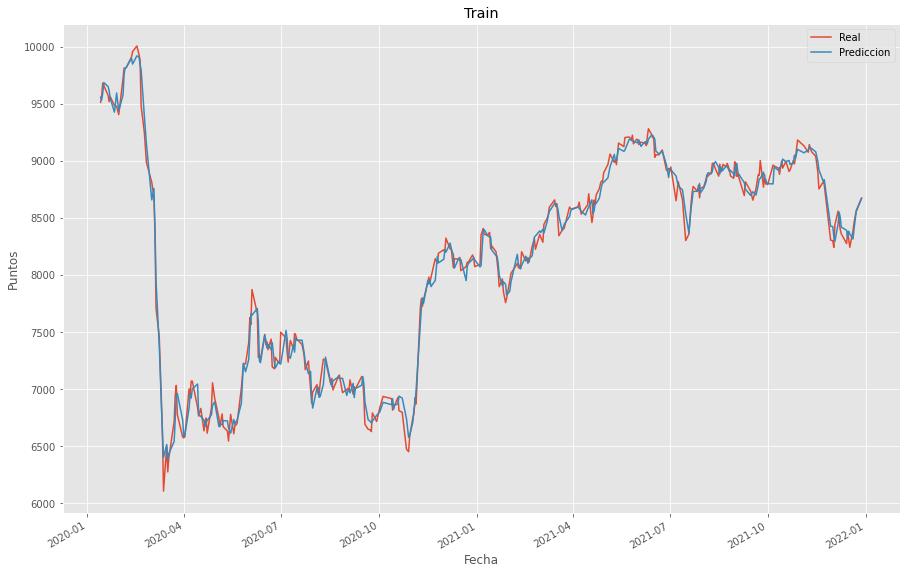

In [75]:
df_train[['futIBEX', 'pred']].plot(figsize=(15,10))
plt.legend(['Real','Prediccion'])
plt.ylabel('Puntos')
plt.xlabel('Fecha')
plt.title('Train');

In [76]:
y_true=df_train['flag']
y_pred=df_train['predflag']

In [77]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.7052023121387283

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.6846590909090909

### TEST

In [79]:
#Valores y del test
y_test

,futIBEX
date,
2021-09-14,8635.4
2021-02-17,8058.1
2021-07-12,8694.8
2021-11-19,8821.3
2021-09-13,8780.0
...,...
2020-05-22,6856.8
2020-08-13,7154.3
2021-12-27,8688.9


In [80]:
#Predicciones de y del TEST

#Tomo los datos verdaderos para añadirle las fechas a las predicciones
y_verdad=y_test.copy() #/!\ TEST/TRAIN /!\
y_verdad.reset_index(drop=False, inplace=True)

#Genero un DF con las predicciones
y_prediccion=pd.DataFrame(test_predictions, columns=['pred']) #/!\ TEST/TRAIN /!\

#Le doy fecha a las predicciones
y_pred_test=y_verdad.join(y_prediccion).set_index('date').drop('futIBEX', axis=1)
y_pred_test=round(y_pred_test[['pred']],1)

#En y_pred se guardan las predicciones realizadas
y_pred_test


,pred
date,
2021-09-14,8781.8
2021-02-17,8145.9
2021-07-12,8833.8
2021-11-19,8774.5
2021-09-13,8787.0
...,...
2020-05-22,6727.0
2020-08-13,7249.4
2021-12-27,8609.9


In [81]:
#Se genera un conjunto de datos 
df_test=pd.merge(X_test[['^IBEX']], y_test, on='date')
df_test=pd.merge(df_test, df_ori[['dif','flag']], on='date')
df_test=pd.merge(df_test, y_pred_test, on='date')

#Se calcula la diferencia entre el valor actual y el predicho para mañana
df_test['preddif']=round(df_test['pred']-df_test['^IBEX'],2)

#Se calculan las señales de compra
df_test.loc[df_test['preddif'] >= 0, 'predflag'] = 1 
df_test.loc[df_test['preddif'] < 0, 'predflag'] = 0
df_test

,^IBEX,futIBEX,dif,flag,pred,preddif,predflag
date,,,,,,,
2021-09-14,8780.0,8635.4,-36.1,0.0,8781.8,1.8,1.0
2021-02-17,8122.7,8058.1,-31.0,0.0,8145.9,23.2,1.0
2021-07-12,8816.7,8694.8,40.1,0.0,8833.8,17.1,1.0
2021-11-19,8753.2,8821.3,-150.0,1.0,8774.5,21.3,1.0
2021-09-13,8816.1,8780.0,120.8,0.0,8787.0,-29.1,0.0
...,...,...,...,...,...,...,...
2020-05-22,6697.5,6856.8,11.4,1.0,6727.0,29.5,1.0
2020-08-13,7250.5,7154.3,-45.5,0.0,7249.4,-1.1,0.0
2021-12-27,8622.1,8688.9,58.4,1.0,8609.9,-12.2,0.0


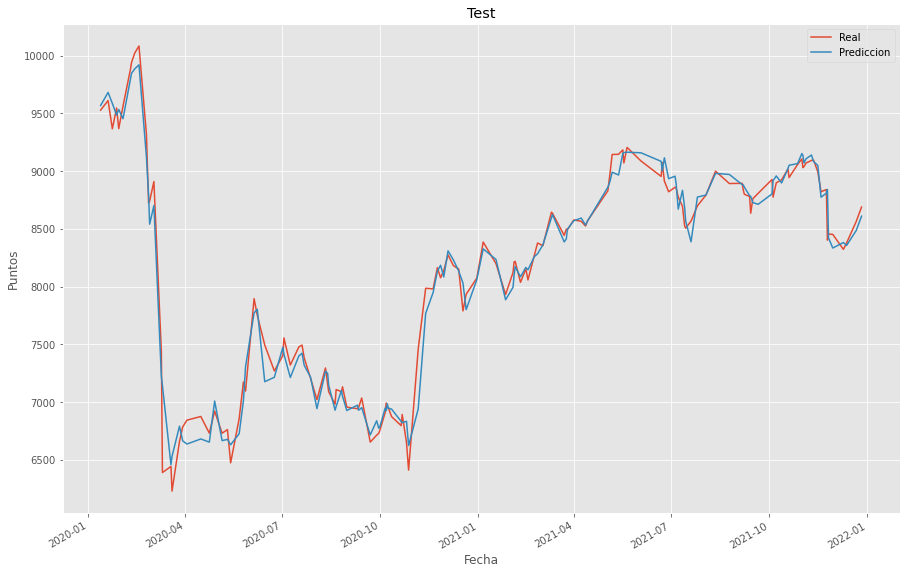

In [82]:
df_test[['futIBEX', 'pred']].plot(figsize=(15,10))
plt.legend(['Real','Prediccion'])
plt.ylabel('Puntos')
plt.xlabel('Fecha')
plt.title('Test');

In [83]:
y_true=df_test['flag']
y_pred=df_test['predflag']

In [84]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.575

In [85]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5328947368421053

## Prueba del modelo predictivo para obtener beneficios

In [86]:
df_ori

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,flag,^IBEX,futIBEX
date,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,0.0,9543.9,9528.3
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,0.0,9528.3,9511.7
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,1.0,9511.7,9572.5
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,1.0,9572.5,9681.3
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,0.0,9681.3,9658.8
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,1.0,8387.5,8459.1
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,1.0,8459.1,8563.7
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,1.0,8563.7,8563.7


In [89]:
X_train.columns.tolist()

['BZ=F', 'GBPUSD=X', '^GDAXI', '^N225', 'MA7', 'difMA7', 'dif', '^IBEX']

In [90]:
#Se va a probar el modelo de regresión para todo el rango de valores del estudio
var_pruebas=X_train.columns.tolist()
df_pruebas=df_ori[var_pruebas+['flag','futIBEX']]
df_pruebas

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,futIBEX
date,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9528.3
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9511.7
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9572.5
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9681.3
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9658.8
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8459.1
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8563.7
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8563.7


In [91]:
#Se realiza la predicción para todo el conjunto
df_pruebas['predIBEX'] = automl.predict(df_pruebas.iloc[:,0:-2])
df_pruebas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,futIBEX,predIBEX
date,,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9528.3,9568.226974
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9511.7,9556.735779
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9572.5,9533.548981
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9681.3,9593.634918
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9658.8,9685.017395
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8459.1,8403.027298
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8563.7,8486.002838
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8563.7,8554.797867


In [92]:
#Se calcula la diferencia esperada entre el valor predicho para mañana y el valor real de hoy
df_pruebas['preddif']=round((df_pruebas['predIBEX']-df_pruebas['^IBEX']),2)
df_pruebas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,futIBEX,predIBEX,preddif
date,,,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9528.3,9568.226974,24.33
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9511.7,9556.735779,28.44
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9572.5,9533.548981,21.85
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9681.3,9593.634918,21.13
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9658.8,9685.017395,3.72
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8459.1,8403.027298,15.53
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8563.7,8486.002838,26.90
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8563.7,8554.797867,-8.90


In [93]:
#Se calcula la señal de compra-venta con la predicción
#Si el valor predicho para mañana es superior o igual, se compra (1)
#Si el valor predicho para mañana es inferior, se vende (0)
#Se calculan las señales de compra
df_pruebas.loc[df_pruebas['preddif'] >= 0, 'predflag'] = 1 
df_pruebas.loc[df_pruebas['preddif'] < 0, 'predflag'] = 0
df_pruebas

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,futIBEX,predIBEX,preddif,predflag
date,,,,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9528.3,9568.226974,24.33,1.0
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9511.7,9556.735779,28.44,1.0
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9572.5,9533.548981,21.85,1.0
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9681.3,9593.634918,21.13,1.0
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9658.8,9685.017395,3.72,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8459.1,8403.027298,15.53,1.0
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8563.7,8486.002838,26.90,1.0
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8563.7,8554.797867,-8.90,0.0


### Evaluación del rendimiento económico

In [94]:
# Función para la evaluación de la operación
def evalua (prediccion, realidad):
  if prediccion == 1 and realidad ==1:
    res=1
  elif prediccion == 0 and realidad ==1:
    res=0
  elif prediccion == 1 and realidad ==0:
    res=-1
  elif prediccion == 0 and realidad ==0:
    res=0
  return res

In [95]:
#Cálculo del rendimiento de las operaciones
rend_total=0
for index, fila in df_pruebas.iterrows():
  rendimiento=evalua(fila['predflag'],fila['flag'])
  rend_total=rend_total+rendimiento
print("Rendimiento acumulado:",rend_total)

Rendimiento acumulado: 83


# TPOT

## Instalación de la librería

In [96]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 87 kB 3.7 MB/s 
     |████████████████████████████████| 255.9 MB 45 kB/s 
     |████████████████████████████████| 139 kB 56.6 MB/s 
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11956 sha256=5acd6a79db7e23dfa501be47a487af20f68bd9554d5582eb77f9c48a31ce65a6
  Stored in directory: /root/.cache/pip/wheels/e2/d2/79/eaf81edb391e27c87f51b8ef901ecc85a5363dc96b8b8d71e3
Successfully built stopit
  Attempting uninstall: xgboost
    Found existing installation: xgboost 0.90
    Uninstalling xgboost-0.90:
      Successfully uninstalled xgboost-0.90


In [97]:
from tpot import TPOTRegressor
from sklearn.datasets import make_regression

## Preparación de los datos

In [98]:
y_test_tpot=y_test['futIBEX'].ravel()
y_test_tpot

array([ 8635.4,  8058.1,  8694.8,  8821.3,  8780. ,  7494.5,  9611.3,
        8899. ,  8808.4,  8792.9,  8378.1,  7932.5,  8741.5,  9057.7,
        8378.5,  9546.7,  8776.6,  7021.6,  8821.2,  8894.5,  7174.5,
        8577.6,  7090.7,  8153.7,  9074.1,  6943.2,  6951. ,  6844.3,
        8122.6,  7036. ,  8443.7,  6474.9,  8840.9,  8910. ,  8164.7,
        8699.2,  9095.7,  9145.6,  8723.2,  8037.6,  6893.4,  9366.3,
        7384.9,  8563.7,  6443.3,  8492.1,  9562.9,  6796.6, 10022.2,
        6762.7,  7789.8,  6730.7,  9367.9,  7270.3,  8199. ,  8775. ,
        6992.8,  7206.2,  6785.4,  8954.1,  6654.2,  8993.4,  6922.3,
        9105.7,  8402.7,  9144.3,  6731.8,  8140.8,  6713.6,  6950.9,
        6951.1, 10083.6,  7896.1,  7981.2,  8571.6,  7495.3,  6230.2,
        8635.4,  8913.7,  8076.9,  6956.9,  8525.1,  7459.4,  8385.8,
        8927.4,  8944.3,  6875.8,  9030.8,  8214.7,  7321.1,  8838.7,
        9017.9,  6390.9,  6754.5,  7436.4,  6910.1,  7752.3,  7296. ,
        9183.9,  903

## Creación del modelo con TPOT

In [102]:
#Se genera el modelo de machine automáticamente mediante TPOT
tpot = TPOTRegressor(generations=30, population_size=30, verbosity=2, random_state=42, scoring='neg_median_absolute_error')

#Se entrena el modelo generado mediante TPOT
tpot.fit(X_train, y_train)

#Se observan los resultados
print(tpot.score(X_test, y_test_tpot))

#Se guarda el modelo
tpot.export('tpot_ibex.py')

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Optimization Progress:   0%|          | 0/930 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -62.88694944637973

Generation 2 - Current best internal CV score: -62.88694944637973

Generation 3 - Current best internal CV score: -62.4023316589165

Generation 4 - Current best internal CV score: -62.4023316589165

Generation 5 - Current best internal CV score: -62.4023316589165

Generation 6 - Current best internal CV score: -62.4023316589165

Generation 7 - Current best internal CV score: -62.4023316589165

Generation 8 - Current best internal CV score: -62.33554201612742

Generation 9 - Current best internal CV score: -61.9348185391179

Generation 10 - Current best internal CV score: -61.9348185391179

Generation 11 - Current best internal CV score: -61.9348185391179

Generation 12 - Current best internal CV score: -61.177221947222094

Generation 13 - Current best internal CV score: -61.177221947222094

Generation 14 - Current best internal CV score: -60.93380325136286

Generation 15 - Current best internal CV score: -60.9338032513

## Resultados

In [110]:
#Se obtienen los resultados de las predicciones con el modelo generado por TPOT
y_pred_train=tpot.predict(X_train)
y_pred_train

array([6956.85225   , 8221.88391852, 8155.79043519, 7009.0638951 ,
       8683.57723095, 9053.88575   , 7428.29694365, 6650.2445    ,
       8877.37763333, 6836.351025  , 8921.27724762, 7640.21206852,
       6575.43926667, 8355.64275238, 8937.41988095, 9581.64993043,
       7141.81183333, 9237.49041667, 6870.23233333, 8938.31645   ,
       8570.17053333, 7911.08786667, 6712.11276667, 8562.52298571,
       6972.01601667, 6869.62341667, 8714.56303333, 9180.48208333,
       8121.06725   , 8059.78354048, 7001.92641176, 9171.87395833,
       8855.6842    , 7962.56791667, 8449.5684    , 8938.46008095,
       8134.48616667, 8095.10041667, 9529.44790554, 8726.85054762,
       8299.03858333, 9304.44727221, 7036.51392843, 8724.64923333,
       8851.73715   , 7081.64371176, 8204.50283333, 9127.7738    ,
       8545.72741905, 8646.8266    , 8919.56741667, 8937.91601667,
       8890.65266667, 6670.58948333, 7280.55680556, 8912.05713333,
       8406.57955   , 8633.38370238, 9783.1442971 , 9652.50113

In [114]:
#Puntuación de automl del modelo obtenido
#Entrenamiento
print('MAE con el conjunto de entrenamiento:', round(tpot.score(X_train, y_train),2));

#Validación
print('MAE con el conjunto de validación:', round(tpot.score(X_test, y_test),2));

MAE con el conjunto de entrenamiento: -26.84
MAE con el conjunto de validación: -50.54


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Métricas

In [117]:
#R2
train_predictions = tpot.predict(X_train)
print("Train R2 score:", metrics.r2_score(y_train, train_predictions))
test_predictions = tpot.predict(X_test)
print("Test R2 score:", metrics.r2_score(y_test, test_predictions))

Train R2 score: 0.9968170668731628
Test R2 score: 0.9778078837394476


### Train

In [118]:
#Metricas relevantes del modelo generado y sus predicciones

#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_train, train_predictions)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_train, train_predictions)*100

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_train, train_predictions)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#R2
r2 = metrics.r2_score(y_train,train_predictions)

print("- TRAIN -")
print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2),"%")
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

- TRAIN -
Resultado de las métricas:
MAE: 38.14
MAPE: 0.49 %
RMSE 52.25
R2: 1.0


### Test

In [119]:
#Metricas relevantes del modelo generado y sus predicciones

#MAE (Media de Errores Absoluta)
mae = metrics.mean_absolute_error(y_test, test_predictions)

#MAPE (Media de Errores Absolutos Porcentuales)
mape = mean_absolute_percentage_error(y_test, test_predictions)*100

#MSE (Media de Errores al Cuadrado)
mse = metrics.mean_squared_error(y_test, test_predictions)

#RMSE (Raíz de la Media de Errores al Cuadrado)
rmse = np.sqrt(mse)

#R2
r2 = metrics.r2_score(y_test,test_predictions)

print("- TEST -")
print("Resultado de las métricas:")
print("MAE:",round(mae, 2))
print("MAPE:",round(mape, 2),"%")
print("RMSE", round(rmse, 2))
print("R2:", round(r2, 2))

- TEST -
Resultado de las métricas:
MAE: 88.82
MAPE: 1.14 %
RMSE 139.63
R2: 0.98


## Gráficas test y train vs valores reales

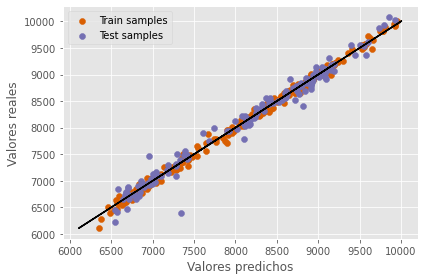

In [129]:
plt.plot(y_train, y_train, c='black')
plt.scatter(train_predictions, y_train, label="Train samples", c='#d95f02')
plt.scatter(test_predictions, y_test, label="Test samples", c='#7570b3')
plt.xlabel("Valores predichos")
plt.ylabel("Valores reales")
plt.legend()
plt.plot(c='k', zorder=0)
plt.tight_layout()
plt.show()

## Análisis de residuos

### Train

In [130]:
y_verdad=y_train.copy()
y_verdad.reset_index(drop=True, inplace=True)
y_verdad

,futIBEX
0,7033.2
1,8200.7
2,8174.8
3,7006.0
4,8701.9
...,...
347,7626.4
348,8753.2
349,8711.4
350,8816.7


In [131]:
y_prediccion=pd.DataFrame(train_predictions, columns=['pred'])
y_prediccion

,pred
0,6956.852250
1,8221.883919
2,8155.790435
3,7009.063895
4,8683.577231
...,...
347,7552.879155
348,8817.519667
349,8655.440981
350,8805.697200


In [132]:
# Análisis de residuos
residuos_train=y_prediccion['pred'] - y_verdad['futIBEX']
residuos_train

0     -76.347750
1      21.183919
2     -19.009565
3       3.063895
4     -18.322769
         ...    
347   -73.520845
348    64.319667
349   -55.959019
350   -11.002800
351   -32.278083
Length: 352, dtype: float64

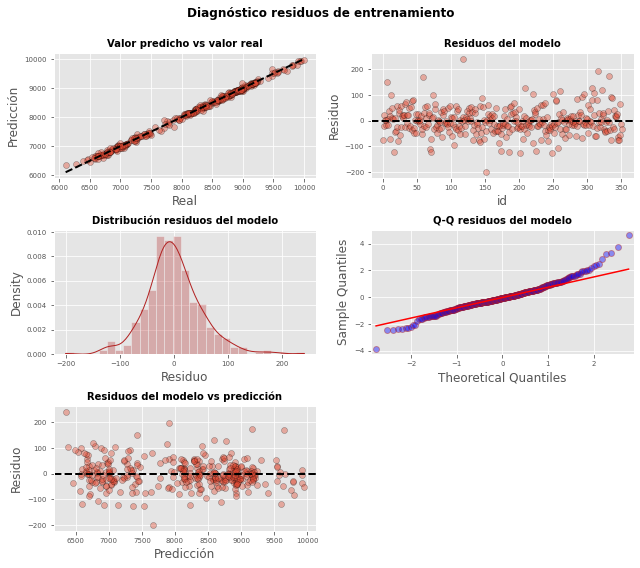

In [133]:
#Gráficas para analizar los residuos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

#Gráfica 1: Predicción vs Real
axes[0, 0].scatter(y_train, train_predictions, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#Gráfica 2: Residuos
axes[0, 1].scatter(list(range(len(y_train))), residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_train,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

#Gráfica 3: Distribución de residuos
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_train,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)

#Gráfica 4: Q-Q del modelo
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

#Gráfica 5: Residuos del model vs predicción
axes[2, 0].scatter(train_predictions, residuos_train,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos de entrenamiento', fontsize = 12, fontweight = "bold");

Para comprobar si los residuos siguen una distribución normal, se emplearán los test estadísticos de Shapiro y de D'Agostino's K-squared test

In [134]:
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

ShapiroResult(statistic=0.9666509628295898, pvalue=3.27993575410801e-07)

In [135]:
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 37.633987403990744, p-value = 6.727961060335162e-09


### Test

In [136]:
y_verdad=y_test.copy()
y_verdad.reset_index(drop=True, inplace=True)
y_verdad

,futIBEX
0,8635.4
1,8058.1
2,8694.8
3,8821.3
4,8780.0
...,...
147,6856.8
148,7154.3
149,8688.9
150,9092.2


In [137]:
y_prediccion=pd.DataFrame(test_predictions, columns=['pred'])
y_prediccion

,pred
0,8763.521333
1,8170.223750
2,8836.839367
3,8801.336133
4,8791.400583
...,...
147,6701.576383
148,7191.096206
149,8610.358762
150,9102.645007


In [138]:
# Análisis de residuos
residuos_test=y_prediccion['pred'] - y_verdad['futIBEX']
residuos_test

0      128.121333
1      112.123750
2      142.039367
3      -19.963867
4       11.400583
          ...    
147   -155.223617
148     36.796206
149    -78.541238
150     10.445007
151     22.741202
Length: 152, dtype: float64

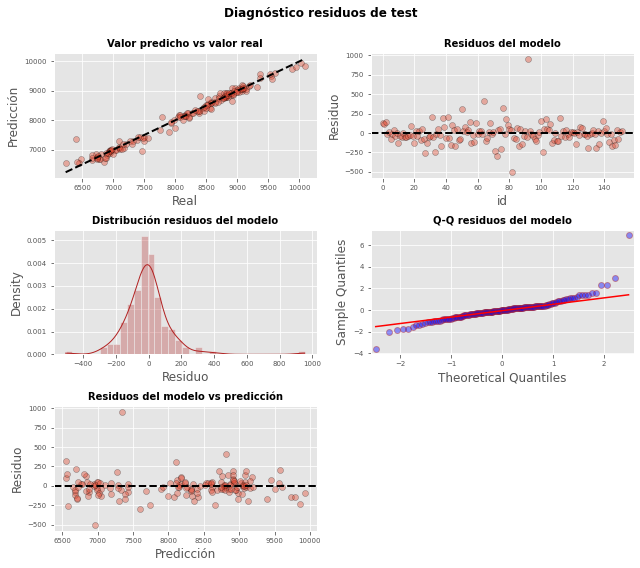

In [139]:
#Gráficas para analizar los residuos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(9, 8))

#Gráfica 1: Predicción vs Real
axes[0, 0].scatter(y_test, test_predictions, edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
                'k--', color = 'black', lw=2)
axes[0, 0].set_title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
axes[0, 0].set_xlabel('Real')
axes[0, 0].set_ylabel('Predicción')
axes[0, 0].tick_params(labelsize = 7)

#Gráfica 2: Residuos
axes[0, 1].scatter(list(range(len(y_test))), residuos_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[0, 1].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[0, 1].set_title('Residuos del modelo', fontsize = 10, fontweight = "bold")
axes[0, 1].set_xlabel('id')
axes[0, 1].set_ylabel('Residuo')
axes[0, 1].tick_params(labelsize = 7)

sns.histplot(
    data    = residuos_test,
    stat    = "density",
    kde     = True,
    line_kws= {'linewidth': 1},
    color   = "firebrick",
    alpha   = 0.3,
    ax      = axes[1, 0]
)

#Gráfica 3: Distribución de residuos
axes[1, 0].set_title('Distribución residuos del modelo', fontsize = 10,
                     fontweight = "bold")
axes[1, 0].set_xlabel("Residuo")
axes[1, 0].tick_params(labelsize = 7)


sm.qqplot(
    residuos_test,
    fit   = True,
    line  = 'q',
    ax    = axes[1, 1], 
    color = 'firebrick',
    alpha = 0.4,
    lw    = 2
)

#Gráfica 4: Q-Q del modelo
axes[1, 1].set_title('Q-Q residuos del modelo', fontsize = 10, fontweight = "bold")
axes[1, 1].tick_params(labelsize = 7)

#Gráfica 5: Residuos del model vs predicción
axes[2, 0].scatter(test_predictions, residuos_test,
                   edgecolors=(0, 0, 0), alpha = 0.4)
axes[2, 0].axhline(y = 0, linestyle = '--', color = 'black', lw=2)
axes[2, 0].set_title('Residuos del modelo vs predicción', fontsize = 10, fontweight = "bold")
axes[2, 0].set_xlabel('Predicción')
axes[2, 0].set_ylabel('Residuo')
axes[2, 0].tick_params(labelsize = 7)

# Se eliminan los axes vacíos
fig.delaxes(axes[2,1])

fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Diagnóstico residuos de test', fontsize = 12, fontweight = "bold");

Para comprobar si los residuos siguen una distribución normal, se emplearán los test estadísticos de Shapiro y de D'Agostino's K-squared test

In [140]:
shapiro_test = stats.shapiro(residuos_test)
shapiro_test

ShapiroResult(statistic=0.8378246426582336, pvalue=1.1157580068199557e-11)

In [141]:
k2, p_value = stats.normaltest(residuos_test)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 100.36662487344395, p-value = 1.6056996958379405e-22


## Despliegue del modelo

### TRAIN

In [142]:
#Valores y del test
y_train

,futIBEX
date,
2020-03-25,7033.2
2020-12-02,8200.7
2020-12-28,8174.8
2020-09-02,7006.0
2021-04-23,8701.9
...,...
2020-06-02,7626.4
2021-11-18,8753.2
2021-04-16,8711.4


In [143]:
#Predicciones de y del Train

#Tomo los datos verdaderos para añadirle las fechas a las predicciones
y_verdad=y_train.copy() #/!\ TEST/TRAIN /!\
y_verdad.reset_index(drop=False, inplace=True)

#Genero un DF con las predicciones
y_prediccion=pd.DataFrame(train_predictions, columns=['pred']) #/!\ TEST/TRAIN /!\

#Le doy fecha a las predicciones
y_pred_train=y_verdad.join(y_prediccion).set_index('date').drop('futIBEX', axis=1)
y_pred_train=round(y_pred_train[['pred']],1)

#En y_pred se guardan las predicciones realizadas
y_pred_train


,pred
date,
2020-03-25,6956.9
2020-12-02,8221.9
2020-12-28,8155.8
2020-09-02,7009.1
2021-04-23,8683.6
...,...
2020-06-02,7552.9
2021-11-18,8817.5
2021-04-16,8655.4


In [144]:
#Se genera un conjunto de datos 
df_train=pd.merge(X_train[['^IBEX']], y_train, on='date')
df_train=pd.merge(df_train, df_ori[['dif','flag']], on='date')
df_train=pd.merge(df_train, y_pred_train, on='date')

#Se calcula la diferencia entre el valor actual y el predicho para mañana
df_train['preddif']=round(df_train['pred']-df_train['^IBEX'],2)

#Se calculan las señales de compra
df_train.loc[df_train['preddif'] >= 0, 'predflag'] = 1 
df_train.loc[df_train['preddif'] < 0, 'predflag'] = 0
df_train

,^IBEX,futIBEX,dif,flag,pred,preddif,predflag
date,,,,,,,
2020-03-25,6942.4,7033.2,225.1,1.0,6956.9,14.5,1.0
2020-12-02,8220.8,8200.7,80.0,0.0,8221.9,1.1,1.0
2020-12-28,8155.6,8174.8,44.1,1.0,8155.8,0.2,1.0
2020-09-02,6996.9,7006.0,40.0,1.0,7009.1,12.2,1.0
2021-04-23,8618.6,8701.9,-38.2,1.0,8683.6,65.0,1.0
...,...,...,...,...,...,...,...
2020-06-02,7408.1,7626.4,186.7,1.0,7552.9,144.8,1.0
2021-11-18,8903.2,8753.2,-90.2,0.0,8817.5,-85.7,0.0
2021-04-16,8613.5,8711.4,41.9,1.0,8655.4,41.9,1.0


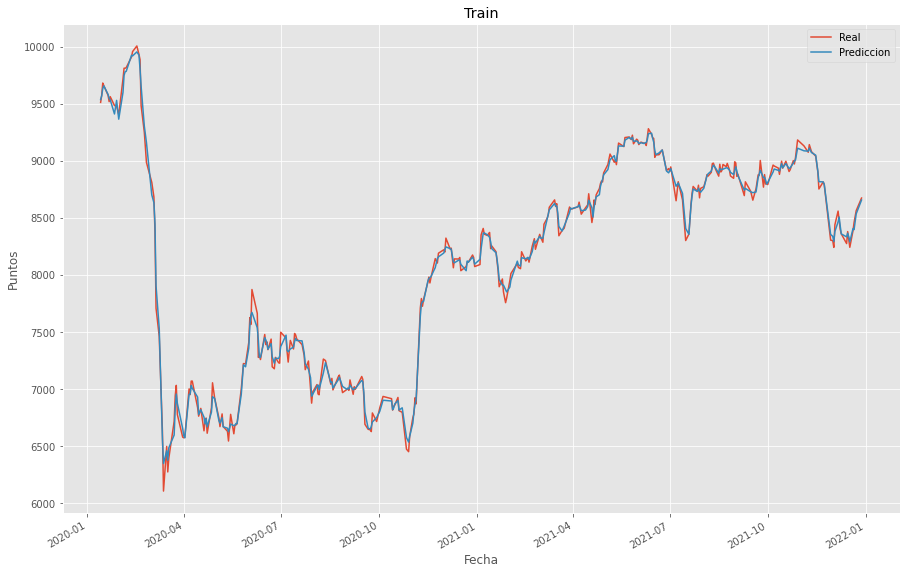

In [145]:
df_train[['futIBEX', 'pred']].plot(figsize=(15,10))
plt.legend(['Real','Prediccion'])
plt.ylabel('Puntos')
plt.xlabel('Fecha')
plt.title('Train');

In [146]:
y_true=df_train['flag']
y_pred=df_train['predflag']

In [147]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.9101123595505618

In [148]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.8977272727272727

### TEST

In [149]:
#Valores y del test
y_test

,futIBEX
date,
2021-09-14,8635.4
2021-02-17,8058.1
2021-07-12,8694.8
2021-11-19,8821.3
2021-09-13,8780.0
...,...
2020-05-22,6856.8
2020-08-13,7154.3
2021-12-27,8688.9


In [150]:
#Predicciones de y del TEST

#Tomo los datos verdaderos para añadirle las fechas a las predicciones
y_verdad=y_test.copy() #/!\ TEST/TRAIN /!\
y_verdad.reset_index(drop=False, inplace=True)

#Genero un DF con las predicciones
y_prediccion=pd.DataFrame(test_predictions, columns=['pred']) #/!\ TEST/TRAIN /!\

#Le doy fecha a las predicciones
y_pred_test=y_verdad.join(y_prediccion).set_index('date').drop('futIBEX', axis=1)
y_pred_test=round(y_pred_test[['pred']],1)

#En y_pred se guardan las predicciones realizadas
y_pred_test


,pred
date,
2021-09-14,8763.5
2021-02-17,8170.2
2021-07-12,8836.8
2021-11-19,8801.3
2021-09-13,8791.4
...,...
2020-05-22,6701.6
2020-08-13,7191.1
2021-12-27,8610.4


In [151]:
#Se genera un conjunto de datos 
df_test=pd.merge(X_test[['^IBEX']], y_test, on='date')
df_test=pd.merge(df_test, df_ori[['dif','flag']], on='date')
df_test=pd.merge(df_test, y_pred_test, on='date')

#Se calcula la diferencia entre el valor actual y el predicho para mañana
df_test['preddif']=round(df_test['pred']-df_test['^IBEX'],2)

#Se calculan las señales de compra
df_test.loc[df_test['preddif'] >= 0, 'predflag'] = 1 
df_test.loc[df_test['preddif'] < 0, 'predflag'] = 0
df_test

,^IBEX,futIBEX,dif,flag,pred,preddif,predflag
date,,,,,,,
2021-09-14,8780.0,8635.4,-36.1,0.0,8763.5,-16.5,0.0
2021-02-17,8122.7,8058.1,-31.0,0.0,8170.2,47.5,1.0
2021-07-12,8816.7,8694.8,40.1,0.0,8836.8,20.1,1.0
2021-11-19,8753.2,8821.3,-150.0,1.0,8801.3,48.1,1.0
2021-09-13,8816.1,8780.0,120.8,0.0,8791.4,-24.7,0.0
...,...,...,...,...,...,...,...
2020-05-22,6697.5,6856.8,11.4,1.0,6701.6,4.1,1.0
2020-08-13,7250.5,7154.3,-45.5,0.0,7191.1,-59.4,0.0
2021-12-27,8622.1,8688.9,58.4,1.0,8610.4,-11.7,0.0


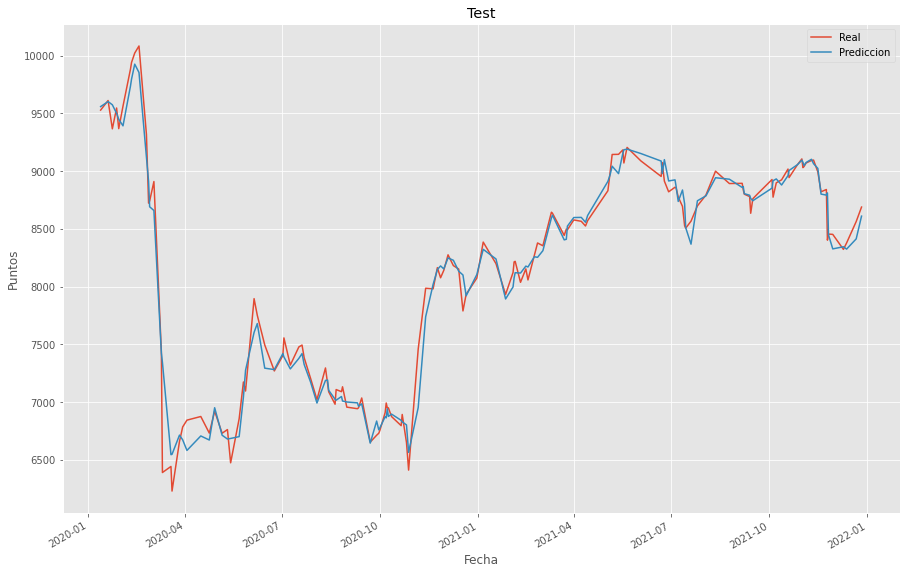

In [152]:
df_test[['futIBEX', 'pred']].plot(figsize=(15,10))
plt.legend(['Real','Prediccion'])
plt.ylabel('Puntos')
plt.xlabel('Fecha')
plt.title('Test');

In [153]:
y_true=df_test['flag']
y_pred=df_test['predflag']

In [154]:
from sklearn.metrics import precision_score
precision_score(y_true, y_pred)

0.6527777777777778

In [155]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

0.5986842105263158

## Prueba del modelo predictivo para obtener beneficios

In [156]:
df_ori

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,flag,^IBEX,futIBEX
date,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,0.0,9543.9,9528.3
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,0.0,9528.3,9511.7
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,1.0,9511.7,9572.5
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,1.0,9572.5,9681.3
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,0.0,9681.3,9658.8
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,1.0,8387.5,8459.1
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,1.0,8459.1,8563.7
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,1.0,8563.7,8563.7


In [164]:
X_train.columns.tolist()

['BZ=F', 'GBPUSD=X', '^GDAXI', '^N225', 'MA7', 'difMA7', 'dif', '^IBEX']

In [165]:
#Se va a probar el modelo de regresión para todo el rango de valores del estudio
var_pruebas=X_train.columns.tolist()
df_pruebas=df_ori[var_pruebas+['flag','futIBEX']]
df_pruebas

,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,futIBEX
date,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9528.3
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9511.7
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9572.5
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9681.3
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9658.8
...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8459.1
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8563.7
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8563.7


In [166]:
#Se realiza la predicción para todo el conjunto
df_pruebas['predIBEX'] = tpot.predict(df_pruebas.iloc[:,0:-2])
df_pruebas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,futIBEX,predIBEX
date,,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9528.3,9558.763736
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9511.7,9536.337916
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9572.5,9568.756406
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9681.3,9631.952097
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9658.8,9656.575680
...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8459.1,8397.524731
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8563.7,8413.638014
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8563.7,8535.699467


In [167]:
#Se calcula la diferencia esperada entre el valor predicho para mañana y el valor real de hoy
df_pruebas['preddif']=round((df_pruebas['predIBEX']-df_pruebas['^IBEX']),2)
df_pruebas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,futIBEX,predIBEX,preddif
date,,,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9528.3,9558.763736,14.86
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9511.7,9536.337916,8.04
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9572.5,9568.756406,57.06
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9681.3,9631.952097,59.45
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9658.8,9656.575680,-24.72
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8459.1,8397.524731,10.02
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8563.7,8413.638014,-45.46
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8563.7,8535.699467,-28.00


In [168]:
#Se calcula la señal de compra-venta con la predicción
#Si el valor predicho para mañana es superior o igual, se compra (1)
#Si el valor predicho para mañana es inferior, se vende (0)
#Se calculan las señales de compra
df_pruebas.loc[df_pruebas['preddif'] >= 0, 'predflag'] = 1 
df_pruebas.loc[df_pruebas['preddif'] < 0, 'predflag'] = 0
df_pruebas

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,BZ=F,GBPUSD=X,^GDAXI,^N225,MA7,difMA7,dif,^IBEX,flag,futIBEX,predIBEX,preddif,predflag
date,,,,,,,,,,,,,
2020-01-13,64.20,1.3046,13451.52,23850.57,9609.328571,-65.428571,-29.7,9543.9,0.0,9528.3,9558.763736,14.86,1.0
2020-01-14,64.49,1.2988,13456.49,24025.17,9588.285714,-59.985714,-15.6,9528.3,0.0,9511.7,9536.337916,8.04,1.0
2020-01-15,64.00,1.3023,13432.30,23916.58,9571.385714,-59.685714,-16.6,9511.7,1.0,9572.5,9568.756406,57.06,1.0
2020-01-16,64.62,1.3041,13429.43,23933.13,9558.642857,13.857143,60.8,9572.5,1.0,9681.3,9631.952097,59.45,1.0
2020-01-17,64.85,1.3079,13526.13,24041.26,9557.600000,123.700000,108.8,9681.3,0.0,9658.8,9656.575680,-24.72,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-21,73.98,1.3210,15447.44,28517.59,8324.342857,63.157143,145.1,8387.5,1.0,8459.1,8397.524731,10.02,1.0
2021-12-22,75.29,1.3270,15593.47,28562.21,8328.242857,130.857143,71.6,8459.1,1.0,8563.7,8413.638014,-45.46,0.0
2021-12-23,76.85,1.3352,15756.31,28798.37,8347.728571,215.971429,104.6,8563.7,1.0,8563.7,8535.699467,-28.00,0.0


### Evaluación del rendimiento económico

In [169]:
# Función para la evaluación de la operación
def evalua (prediccion, realidad):
  if prediccion == 1 and realidad ==1:
    res=1
  elif prediccion == 0 and realidad ==1:
    res=0
  elif prediccion == 1 and realidad ==0:
    res=-1
  elif prediccion == 0 and realidad ==0:
    res=0
  return res

In [170]:
#Cálculo del rendimiento de las operaciones
rend_total=0
for index, fila in df_pruebas.iterrows():
  rendimiento=evalua(fila['predflag'],fila['flag'])
  rend_total=rend_total+rendimiento
print("Rendimiento acumulado:",rend_total)

Rendimiento acumulado: 168
